# Sesión 3 B

## 1. Repaso de probabilidad (parte 2B)

### 1.1. Variables aleatorias

Las variables aleatorias son funciones que asignan un valor numérico a cada resultado de un experimento aleatorio. Se clasifican en dos tipos:

* **Variables aleatorias discretas**
* ➡️ **Variables aleatorias continuas**

> **Objetivos:**
> - Repasar la definición de variables aleatorias continuas.
> - Definir la función de densidad de probabilidad y la función de distribución acumulada.
> - Definir el valor esperado y varianza de una variable aleatoria continua.

#### Variables aleatorias continuas

```{admonition} Definición
:class: note

Sea $\Omega$ un espacio muestral continuo, es decir, un conjunto no numerable de posibles resultados de un experimento aleatorio.

Una *variable aleatoria continua* es una función que asigna un _número real_ a cada resultado del espacio muestral:

$$
X: \Omega \to \mathbb{R}
$$

A diferencia de las variables aleatorias discretas, los valores que puede tomar $X$ **no se pueden enumerar**, ya que forman un subconjunto continuo de $\mathbb{R}$. Esto significa que $X$ puede asumir infinitos valores dentro de un intervalo real.

```

##### Antes de empezar: _¿qué es densidad?, ¿y qué es integrar?_

En la vida real, muchos fenómenos no se pueden contar directamente.

El tiempo fluye, la temperatura cambia poco a poco, un objeto se mueve sin saltos y una variable puede tomar infinitos valores entre dos puntos. En estos casos no podemos enumerar unidades como si fueran canicas o dados: estamos frente a lo **continuo**.

Entonces surge una pregunta fundamental:

> ¿Cómo medimos lo que no se puede contar?

La respuesta está en dos herramientas matemáticas muy poderosas: **densidad e integración.**

```{admonition} Densidad e integración: comprender lo continuo
:class: note

🌀 La densidad: mirar lo local

_¿Dónde se concentra algo?_

Pero en lugar de contar unidades, miramos lo que pasa en una región infinitesimal.

En probabilidad, esa idea se traduce en la **función de densidad de probabilidad (PDF)**, que muestra cómo se distribuyen las posibilidades de una variable continua.
```

```{admonition} Integración
:class: note

🌀 Integrar: reunir lo disperso

Integrar es tomar fragmentos del mundo, imperceptibles por sí solos, y sumarlos para construir sentido.

* Reunir las contribuciones dispersas de lo continuo.

La integración responde:

_¿qué tan probable es que el valor esté entre A y B?_

```


Una _variable aleatoria continua_ vive en ese mismo mundo: no tiene "valores posibles" que puedas listar. Tiene un espectro infinito de posibilidades.

* La _densidad_ te dice cómo están distribuidas esas posibildes.

* La _integración_ te permite calcular la probabilidad de que la variable se manifieste dentro de un rango. 

Con esto en mente, la manera más conveniente de definir una distribución continua es a través de la **función de densidad de probabilidad** o PDF _(Probability Density Function)_.

#### 1.1.1. Función de _densidad_ de probabilidad (PDF)

Una PDF es una _función matemática_ que describe cómo se distribuye la probabilidad de una variable aleatoria continua a lo largo de los valores que puede tomar. 

En el contexto de variables aleatorias continuas no hablamos de "función de probabilidad", sino de una **función de densidad de probabilidad p.d.f.** $p(x)$ que debe cumplir:

$$
0 \leq p(x)
$$

esta condición asegura que no haya probabilidades negativas.

Además:

$$
\int_{-\infty}^{\infty} p(x) \mathrm{d}x = 1.
$$

esta segunda condición asegura que la "masa total de probabilidad" esté normalizada a 1.

**Notemos que en este caso la densidad puede ser mayor a $1$.**

| Variables aleatorias discretas | Variables aleatorias continuas |
|--------------------------------|--------------------------------|
| $P(a) = P(X = a)$              | $p(x)$                        |
| $0 \leq P(a) \leq 1$           | $0 \leq p(x)$                 |
| $\sum_a P(a) = 1$              | $\int_{-\infty}^{\infty} p(x)\,dx = 1$ |


#### ¿Por qué $p(x)$ puede ser mayor que 1?

Es importante notar que $p(x)$ no es una probabilidad en sí, sino una **densidad**.

Para obtener una probabilidad real, siempre necesitas un intervalo $[a,b]$ y calcular el área:

![](../images/prob-vars-continuas.png)

La probabilidad real se obtiene integrando la densidad:

* $P(a \leq X \leq b)$ significa el área bajo la curva de $p(x)$ entre $a$ y $b$.

* Esa área sí es una probabilidad y siempre estará entre 0 y 1.

Por esto, aunque $p(x)$ pueda tomar valor mayores que 1, la integral en todo el espacio siempre será 1. 

Por ejemplo, la **función de densidad de probabilidad (PDF)** de la normal estándar $N(0,1)$ es:

$$
p(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2}
$$

La probabilidad de que $X$ esté entre $-1$ y $1$ es:

$$
P(-1 \leq X \leq 1) = \int_{-1}^{1} \frac{1}{\sqrt{2\pi}} e^{-x^2/2}\, dx
$$

![](../images/sesion3-areabajocurva.png)

#### 1.1.2. Función de distribución acumulativa (CDF)

Definimos también la **función de distribución acumulada (CDF)** $P(x)$ como:

$$
P(x) = \int_{-\infty}^{x} p(z)\,\mathrm{d}z,
$$

y representa la probabilidad de que $X$ tome un valor **menor que** $x$, es decir:

$$
P(x) = \mathbb{P}(X < x)
$$

```{admonition} Observaciones
:class: note

Todo lo que vimos en el caso discreto se extiende al caso continuo:

La marginalización, la regla de la cadena, la regla de Bayes, aplican cambiando sumas por integrales y probabilidades por densidades de probabilidad:

- $p(x) = \int_{-\infty}^{\infty} p(x, y) \mathrm{d}y$: Marginalización

- $p(x, y) = p(y | x) p(x) = p(x | y) p(y)$: Regla de la cadena

- $p(x) = \int_{-\infty}^{\infty} p(x | y) p(y) \mathrm{d}y$: Probabilidad total

### 1.2. Distribuciones de probabilidad continuas

#### 1.2.1. Distribución uniforme

**Qué modela:**

Una situación en la que **todos los valores dentro de un intervalo son igualmente probables**. No hay preferencia por ningún punto dentro del rango.

**Ejemplo:**

Medir el tiempo de llegada de un autobús que puede llegar en cualquier momento entre 10:00 y 10:30, con la misma probabilidad en todo ese intervalo.

- Cualquier instante dentro del rango es igualmente probable.

**Parámetros:**

- $a$: límite inferior del intervalo  
- $b$: límite superior del intervalo  
- Se requiere que $a < b$

**Soporte:**

Soporte: $[a, b]$, porque ahí es donde la función vive.

**Se denota como:**

$$
X \sim \text{Uniforme}(a, b)
$$

**Función de densidad (PDF):**

$$
f_X(x) =
\begin{cases}
\frac{1}{b - a} & \text{si } x \in [a, b] \\
0 & \text{en otro caso}
\end{cases}
$$

**Función de distribución acumulada (CDF):**

$$
F_X(x) =
\begin{cases}
0 & x < a \\
\frac{x - a}{b - a} & a \leq x \leq b \\
1 & x > b
\end{cases}
$$

```{admonition} Ejercicio 1
:class: tip

Se tiene una cinta de medir con resolución milimétrica. Si medimos la longitud de unas varillas que fueron cortadas a 1 metro de longitud, el error de medición estará uniformemente distribuido entre -0.5 y 0.5 milímetros.
```

```{thebe-button}
```

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

**Parámetros:**

- `loc` es el *inicio del intervalo*, se interpreta como el parámetro $a$ (límite inferior).  
- `scale` es la *longitud del intervalo*, se interpreta como $b - a$.

Entonces, la distribución se define sobre el intervalo:

$$
X \sim \text{Uniforme}(a = \text{loc},\ b = \text{loc} + \text{scale})
$$

In [2]:
# Variable aleatorio uniforme
X = stats.uniform(loc=-0.5, scale=1.0)

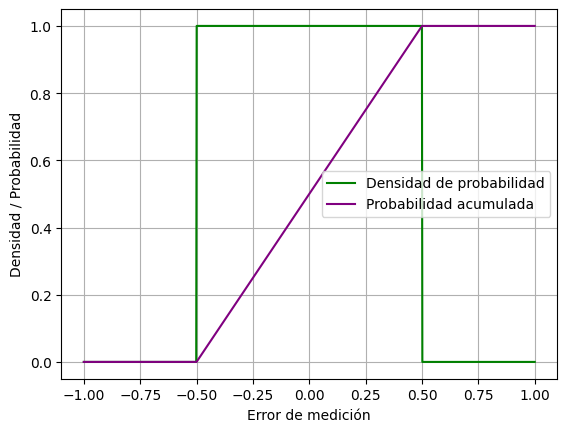

In [3]:
# Gráfico de pdf y cdf
x = np.linspace(-1, 1, 1000)
y1 = X.pdf(x)
y2 = X.cdf(x)
plt.plot(x, y1, color='green', label='Densidad de probabilidad')
plt.plot(x, y2, color='purple', label='Probabilidad acumulada')
plt.xlabel('Error de medición')
plt.ylabel('Densidad / Probabilidad')
plt.legend()
plt.grid()

#### 1.2.2. Distribución exponencial

**Qué modela:**

El **tiempo entre eventos aleatorios** que ocurren a una tasa constante. Es común en procesos de espera, como llamadas telefónicas, llegadas de clientes o tiempo de vida de componentes electrónicos.


**Ejemplo:**

Esperar el siguiente autobús, sabiendo que los autobuses llegan en promedio cada 10 minutos.

- El tiempo de espera entre llegadas puede modelarse con una distribución exponencial.


**Parámetros:**

- $\lambda > 0$: tasa de ocurrencia de eventos (eventos por unidad de tiempo)


**Soporte:**

Soporte: $[0, \infty)$, ya que el tiempo o distancia entre eventos no puede ser negativo.


**Se denota como:**

$$
X \sim \text{Exponencial}(\lambda)
$$


**Función de densidad (PDF):**

$$
f_X(x) =
\begin{cases}
\lambda e^{-\lambda x} & \text{si } x \geq 0 \\\\
0 & \text{en otro caso}
\end{cases}
$$


**Función de distribución acumulada (CDF):**

$$
F_X(x) =
\begin{cases}
0 & x < 0 \\\\
1 - e^{-\lambda x} & x \geq 0
\end{cases}
$$

```{admonition} Ejercicio 2
:class: tip

Si sales de tu casa para tomar un taxi, el tiempo que esperas hasta que llegue el siguiente taxi puede modelarse con una distribución exponencial.

Una manera práctica de estimar el parámetro $\lambda$ es usando la **duración promedio de espera observada**. Por ejemplo, si normalmente esperas unos 5 minutos, puedes estimar:

$$
\lambda \approx \frac{1}{\text{promedio de espera en minutos}}
$$

Entonces podrías modelar el tiempo de espera con:

$$
X \sim \text{Exponencial}(0.2)
$$

Esto significa que los tiempos cortos de espera son más probables que los largos, pero siempre existe la posibilidad de que haya esperas inusualmente largas.
```

In [4]:
# Lambda
lambda_ =1/5

In [5]:
# Variable aleatoria exponencial
X = stats.expon(scale=1/lambda_)

In [11]:
stats.expon?

Signature:       stats.expon(*args, **kwds)
Type:            expon_gen
String form:     <scipy.stats._continuous_distns.expon_gen object at 0x0000018D3363D400>
File:            d:\anaconda3\envs\mgp\lib\site-packages\scipy\stats\_continuous_distns.py
Docstring:      
An exponential continuous random variable.

As an instance of the `rv_continuous` class, `expon` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(x, lo

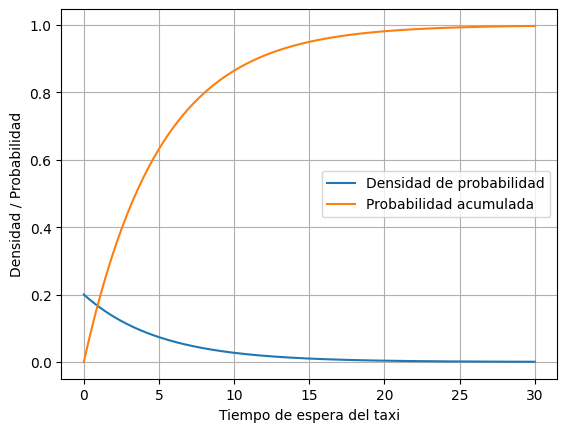

In [6]:
# Gráfico de pdf y cdf
x = np.linspace(0, 30, 1000)
y1 = X.pdf(x)
y2 = X.cdf(x)
plt.plot(x, y1, label='Densidad de probabilidad')
plt.plot(x, y2, label='Probabilidad acumulada')
plt.xlabel('Tiempo de espera del taxi')
plt.ylabel('Densidad / Probabilidad')
plt.legend()
plt.grid()

#### 1.2.3. Distribución normal (Gaussiana)

**Qué modela:**

La distribución normal describe fenómenos que tienden a agruparse alrededor de un valor promedio, con pequeñas variaciones hacia arriba y hacia abajo.

**Ejemplo:**

Las calificaciones de un grupo grande de estudiantes en un examen, donde la mayoría obtiene puntajes cercanos al promedio, y solo unos pocos puntajes muy altos o muy bajos.


**Parámetros:**

- $\mu$: media (valor central)
- $\sigma > 0$: desviación estándar (dispersión)

**Soporte:**

Soporte: $(-\infty, \infty)$, ya que una variable normal puede, en teoría, tomar cualquier valor real.

**Se denota como:**

$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$


**Función de densidad (PDF):**

$$
p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left\{-\frac{(x - \mu)^2}{2 \sigma^2}\right\}.
$$


**Función de distribución acumulada (CDF):**

No tiene una forma cerrada elemental, pero se define como:

$$
F_X(x) = \int_{-\infty}^{x} f_X(t) \, dt
$$

Esta integral representa la probabilidad acumulada de que la variable tome un valor menor que $x$.


In [9]:
# Variable aleatoria normal
mu = 25
sigma = 1

X = stats.norm(loc=mu, scale=sigma)

**Parámetros:**

- `loc` es la *media* de la distribución, se interpreta como el parámetro $\mu$.  
- `scale` es la *desviación estándar*, se interpreta como $\sigma$ (no la varianza).

Entonces, la distribución se define como:

$$
X \sim \mathcal{N}(\mu = \text{loc},\ \sigma^2 = \text{scale}^2)
$$


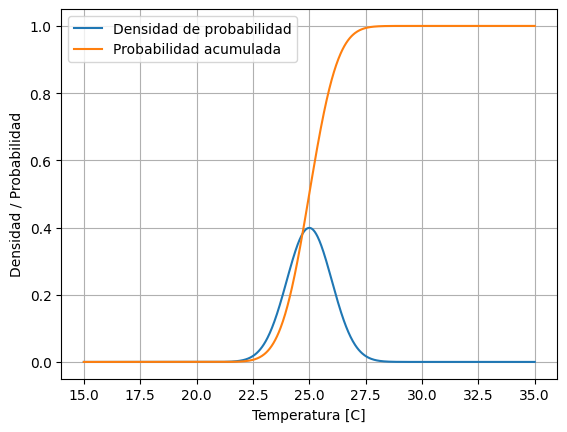

In [10]:
# Gráfico de pdf y cdf
x = np.linspace(15, 35, 1000)
y1 = X.pdf(x)
y2 = X.cdf(x)
plt.plot(x, y1, label='Densidad de probabilidad')
plt.plot(x, y2, label='Probabilidad acumulada')
plt.xlabel('Temperatura [C]')
plt.ylabel('Densidad / Probabilidad')
plt.legend()
plt.grid()

##### Propiedades de la distribución normal

Sea $X \sim \text{Normal}(\mu, \sigma^2)$. Entonces se cumplen las siguientes propiedades fundamentales:

- **Valor esperado (media):**  
  El valor esperado de $X$ es igual al parámetro de media $\mu$:

  $$
  \mathbb{E}[X] = \mu
  $$

- **Varianza:**  
  La varianza de $X$ corresponde al cuadrado de la desviación estándar $\sigma$:

  $$
  \mathrm{Var}(X) = \sigma^2
  $$

### 1.3. Valor esperado y varianza (continuas)

#### 1.3.1. Esperanza

El valor esperado de una función $f(x)$ con respecto a una distribución de probabilidad $p(x)$ se denota por:

$$
\mathbb{E}_p[f] = \int p(x)f(x) \, \mathrm{d}x.
$$

Esto representa una especie de “promedio” de $f(x)$, donde los valores más probables (según $p(x)$) tienen mayor peso.

El valor esperado es una **medida de tendencia central**: nos indica el valor típico o representativo de la función aleatoria en el contexto de su distribución.

![](../images/esp_continuas.png)

- En **morado** se indica la función de densidad de la variable aleatoria $X$.
- En **verde** está la función que queremos "promediar", es decir, la transformación $f(X)$.

Tomamos la fórmula general y la aplica a un caso específico:

> La esperanza de una variable que sigue una distribución exponencial.

![](../images/esp_continuas_2.png)

- Medias: $\mathbb{E}[X]$
- Varianzas: $\mathbb{E}[X^2] - \mathbb{E}[X]^2$
- Transformaciones: $\mathbb{E}[\log(X)], \mathbb{E}[X^3]$, etc.

In [ ]:
from scipy.stats import norm
import numpy as np

# Distribución normal con media=25 y STD=2
distribucion = norm(loc=25, scale=2)

# Valor esperado de X
media = distribucion.expect()

# E[X^2]
esperanza_cuadrado = distribucion.expect(lambda x: x**2)

# Varianza: Var(X) = E[X^2] - (E[X])^2
varianza = esperanza_cuadrado - media**2

# Desviación estándar
desviacion_estandar = np.sqrt(varianza)

# Hacemo print
print("Media (E[X]):", media)
print("Esperanza de X^2 (E[X^2]):", esperanza_cuadrado)
print("Varianza:", varianza)
print("Desviación estándar:", desviacion_estandar)

Media (E[X]): 24.999999999999986
Esperanza de X^2 (E[X^2]): 628.9999999999999
Varianza: 4.000000000000568
Desviación estándar: 2.000000000000142


#### 1.3.2. Varianza

Una medida complementaria al valor esperado es la **varianza**, que mide qué tanto varía $f(x)$ alrededor de su valor esperado. Se denota como:

$$
\mathrm{var}_p[f] = \mathbb{E}_p\left[(f(x) - \mathbb{E}_p[f])^2\right]
$$

y también puede escribirse como:

$$
\mathrm{var}_p[f] = \mathbb{E}_p[f(x)^2] - \left(\mathbb{E}_p[f]\right)^2
$$

Esta forma alternativa resulta muy útil para el cálculo práctico de la varianza.